📌 Project Introduction

In this project, we use three different models to classify images of five different venues: decision tree supervised, decision tree semi-supervised and CNN supervised.
This notebook adress only the first and second models.

📌 Data Set Description

We use 2,960 colorful images categorized into five datasets: bar, beach, store, restaurant, and subway collected from two websites: image.cv and mit.edu. We have eliminated parts of the datasets for having specific classes and also combined datasets.

    Book stores: This class contains 746 images
    bar: This class contains 604 images 
    Subway: This class contains 539 images
    Restaurants: This class contains 449 images
    Beach: This class contains 622 images

📌 In this Project, we will:

    Analyze customer data provided in data set (EDA= exploratory data analysis) 
    Build two models that can classify images

In [ ]:
pip install opencv-python

In [1]:
pip install opencv-python-headless imgaug

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dask.diagnostics import ProgressBar
from PIL import Image
import dask.bag as db
import cv2

### Data  preprosessing

📌 Reading Data Set

In [3]:
img_path = 'final_dataset'

In [4]:
number_classes = {
'Classbar': len(os.listdir('final_dataset/bar')),
'Classbeach': len(os.listdir('final_dataset/beach')),
'Classbookstore': len(os.listdir('final_dataset/bookstore')),
'Classrest': len(os.listdir('final_dataset/restaurant')),
'Classsub': len(os.listdir('final_dataset/subway'))}

📌 Data Exploration

[########################################] | 100% Completed | 2.59 ss


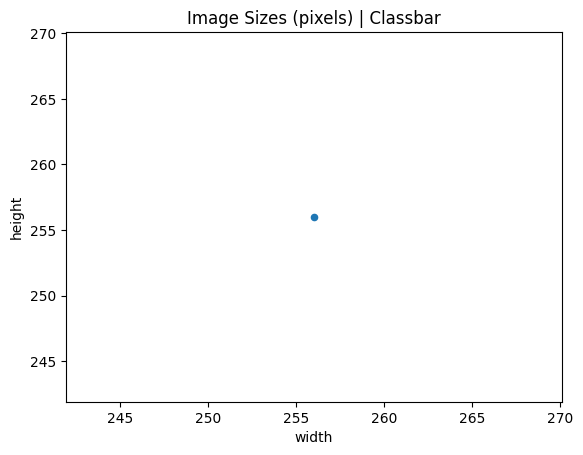

[########################################] | 100% Completed | 2.16 ss


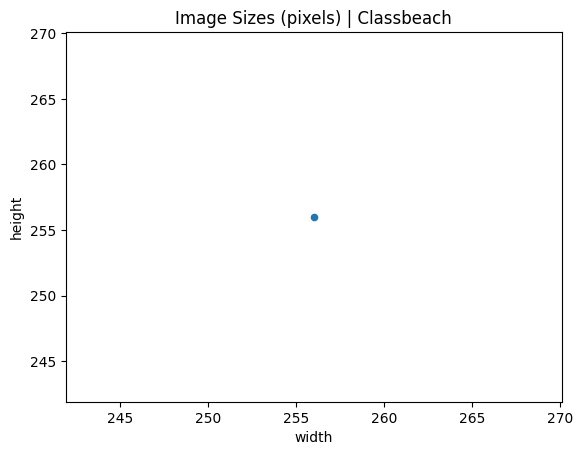

[########################################] | 100% Completed | 2.10 ss


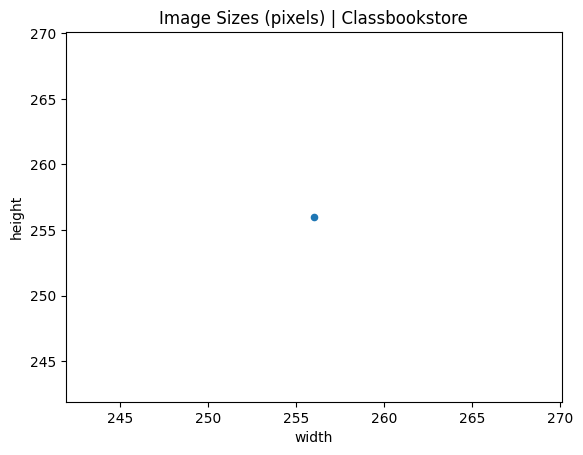

[########################################] | 100% Completed | 2.05 ss


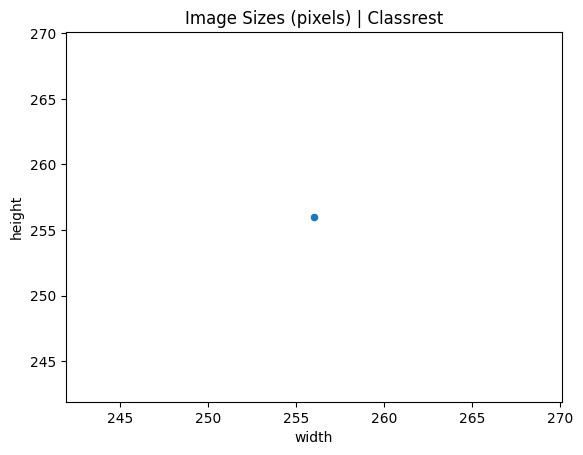

[########################################] | 100% Completed | 2.31 ss


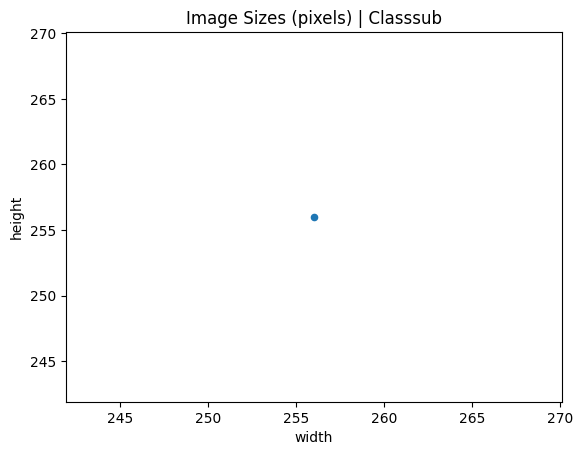

In [5]:
directories = {'Classbar': 'final_dataset/bar',
'Classbeach': 'final_dataset/beach',
'Classbookstore': 'final_dataset/bookstore',
'Classrest': 'final_dataset/restaurant',
'Classsub': 'final_dataset/subway',  }

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 2:  
        h, w = arr.shape
    else:  # Color image
        h, w, d = arr.shape
    return h, w

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)

    with ProgressBar():
        dims = dims.compute()

    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    sizes.plot.scatter(x='width', y='height')
    plt.title('Image Sizes (pixels) | {}'.format(n))
    plt.show()

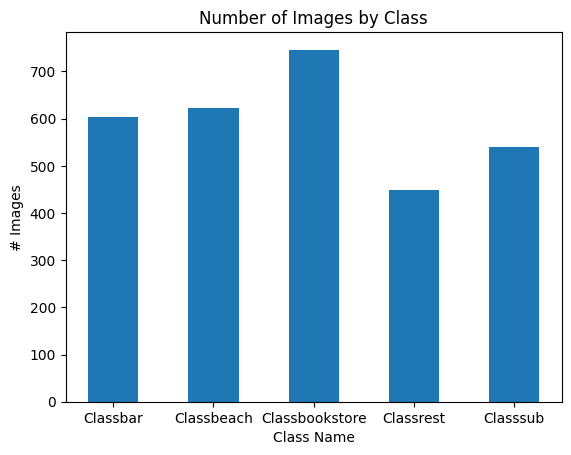

In [6]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

📌 Data Visualisation

In [ ]:
image_path_bar = 'final_dataset/bar'

# Getting a list of all image filenames
image_files = os.listdir(image_path_bar)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_bar, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])  
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_path_beach = 'final_dataset/beach'

image_files = os.listdir(image_path_beach)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_beach, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0]) 
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_path_sub = 'final_dataset/subway'

image_files = os.listdir(image_path_sub)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path_sub, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])  
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Here are the first five images from the bar,  beach and subway dataset. As we can observe, the images seem to have different dimensions and backgrounds.

📌 Data Cleaning

In this part, we go through every class and make sure that we dont have  any duplicated images.

In [ ]:
import imagehash

image_folder='final_dataset'

bar_folder= 'final_dataset/bar'
restaurant_folder='final_dataset/restaurant'
subway_folder = 'final_dataset/subway'
bookstore_folder='final_dataset/bookstore'
beach_folder='final_dataset/beach'

def find_duplicates(image_folder):
    
    image_hashes = {}
    duplicates = []

    for filename in (image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(image_folder, filename)
            with Image.open(filepath) as img:
                hash_value = imagehash.average_hash(img)
                if hash_value in image_hashes:
                    duplicates.append((filepath, image_hashes[hash_value]))
                else:
                    image_hashes[hash_value] = filepath

    return duplicates

In [ ]:
def check_duplicates(bar_folder, restaurant_folder,subway_folder,beach_folder,bookstore_folder):
   #for the bar
    
    print("Checking for duplicates in bar pictures")
    bar_duplicates = find_duplicates(bar_folder)
    if bar_duplicates:
        print("Found duplicates in bar pictures:")
        for dup in bar_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in bar pictures.")


    #for the restaurants
    print("\nChecking for duplicates in restaurant pictures")
    restaurant_duplicates = find_duplicates(restaurant_folder)
    if restaurant_duplicates:
        print("Found duplicates in restaurant pictures:")
        for dup in restaurant_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in restaurant pictures.")

    #for the bookstore
    print("\nChecking for duplicates in bookstore pictures")
    bookstore_duplicates = find_duplicates(bookstore_folder)
    if bookstore_duplicates:
        print("Found duplicates in bookstore pictures:")
        for dup in bookstore_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in bookstore pictures.")


    #for the beach
    print("\nChecking for duplicates in beach pictures")
    beach_duplicates = find_duplicates(beach_folder)
    if beach_duplicates:
        print("Found duplicates in beach pictures:")
        for dup in beach_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in beach pictures.")


    #forr the subway
    print("\nChecking for duplicates in subway pictures")
    subway_duplicates = find_duplicates(subway_folder)
    if subway_duplicates:
        print("Found duplicates in subway pictures:")
        for dup in subway_duplicates:
            print(f"Duplicate pair: {dup[0]} and {dup[1]}")
    else:
        print("No duplicates found in subway pictures.")

check_duplicates(bar_folder, restaurant_folder,subway_folder,beach_folder,bookstore_folder)

Going  throuugh the 5 files, no images were duplicated

📌 Image resizing to 256x256

In [ ]:
import os
import cv2

directories = {'class_bar': 'final_dataset/bar'}

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    for file in filelist:
        image = cv2.imread(file)
        if image is None:
            print("Error ::: Image not found or bad image: " + file)
        else:
            height, width = image.shape[:2]
            if height != 256 or width != 256:
                print("Resizing image: " + file)
                resized_image = cv2.resize(image, (256, 256))
                new_file_name = os.path.join('final_dataset/bar', os.path.basename(file))
                print("Writing resized image: " + new_file_name)
                cv2.imwrite(new_file_name, resized_image)


In [ ]:
directories = {'Classbar': 'final_dataset/bar',
  }

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 2:  
        h, w = arr.shape
    else:  # Color image
        h, w, d = arr.shape
    return h, w

for n, d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)

    with ProgressBar():
        dims = dims.compute()

    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    sizes.plot.scatter(x='width', y='height')
    plt.title('Image Sizes (pixels) | {}'.format(n))
    plt.show()

📌 Data Augmentation

In [7]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [8]:
import imgaug.augmenters as iaa

original_dir = 'final_dataset/restaurant'
augmented_dir = 'final_dataset/restaurant_augmented'

os.makedirs(augmented_dir, exist_ok=True)

filelist = [os.path.join(original_dir, f) for f in os.listdir(original_dir) if f.endswith('.jpg')]

# Define augmentation sequence
augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5),        # Horizontal flip
    iaa.Flipud(0.5),        # Vertical flip
    iaa.Affine(rotate=(-25, 25)), # Rotate
    iaa.Multiply((0.8, 1.2)), # Change brightness
    iaa.GaussianBlur(sigma=(0, 3.0)) # Gaussian blur
])

#save augmented images
def save_augmented_images(images, base_name, start_index, dir_path):
    for i, img in enumerate(images):
        new_file_name = os.path.join(dir_path, f'{base_name}_aug_{start_index + i}.jpg')
        cv2.imwrite(new_file_name, img)

# Augment images until the total count is 640
total_images = len(filelist)
current_count = 0
augmentation_round = 1

while current_count < 640:
    for file in filelist:
        image = cv2.imread(file)
        if image is not None:
            augmented_images = augmentation_seq(images=[image]*5) 
            
            base_name = os.path.splitext(os.path.basename(file))[0]
            save_augmented_images(augmented_images, base_name, current_count, augmented_dir)
            
            current_count += len(augmented_images)
            if current_count >= 600:
                break
        else:
            print(f"Error: Unable to read image {file}")
    augmentation_round += 1

print("Data augmentation complete. Total images:", current_count)

Data augmentation complete. Total images: 640


In [15]:
number_classes = {
'Classbar': len(os.listdir('final_dataset/bar')),
'Classbeach': len(os.listdir('final_dataset/beach')),
'Classbookstore': len(os.listdir('final_dataset/bookstore')),
'AugRestau': len(os.listdir('final_dataset/restaurant_augmented'))  ,
'Classsub': len(os.listdir('final_dataset/subway'))}

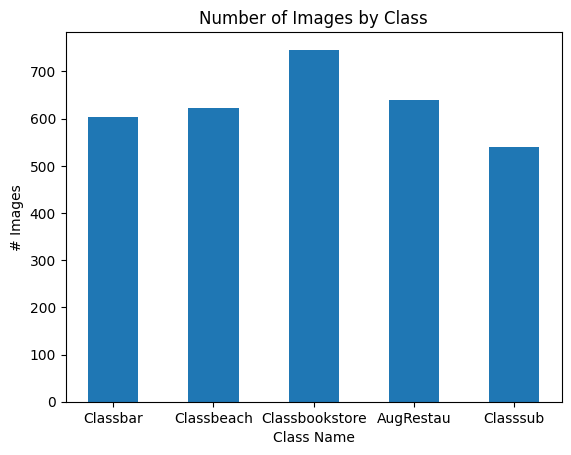

In [16]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');